### K - Nearest Neighbors
Basic Example of K - Nearest Neighbors implementation

## About the Data

Data Set Information:

The dataset is Electronic Health Record Predicting collected from a private Hospital in Indonesia. It contains the patients laboratory test results used to determine next patient treatment whether in care or out care patient. The task embedded to the dataset is classification prediction. 
Attribute Information:
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

* HAEMATOCRIT: Patient laboratory test result of haematocrit
* HAEMOGLOBINS: Patient laboratory test result of haemoglobins
* ERYTHROCYTE: Patient laboratory test result of erythrocyte
* LEUCOCYTE: Patient laboratory test result of leucocyte
* THROMBOCYTE: Patient laboratory test result of thrombocyte
* MCH: Patient laboratory test result of MCH
* MCHC: Patient laboratory test result of MCHC
* MCV: Patient laboratory test result of MCV
* AGE: Patient age
* SEX: Patient gender
* SOURCE: The class target in.= in care patient, out = out care patient


Dataset Source: https://www.kaggle.com/datasets/saurabhshahane/patient-treatment-classification

## 1. Importing Libraries

In [1]:
# Data handling
import pandas as pd

# for model creation and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
# performance metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# for tree vizualisation
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.simplefilter('ignore')

## 2. Data Load & Overview

In [2]:
# importing data
data = pd.read_csv('../Data/patient_data.csv')

In [3]:
# creating a copy of the dataset to avoid permanent changes
df = data.copy()

In [4]:
# looking at the size of the dataset
print(f' *There are {df.shape[0]} observations')
print(f' *There are {df.shape[1]} variables including a dependant variable')

 *There are 4412 observations
 *There are 11 variables including a dependant variable


In [5]:
# looking at the data
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


* Almost all of the features are continious which is good when using GaussianNB classification
* `SEX` is the only variable that will need to be encoded

## 3. Data Preprocessing

In [6]:
# converting both the 'sex' and 'source' columns to category type
df[["SEX","SOURCE"]] = df[["SEX","SOURCE"]].astype('category')

In [7]:
# encoding the "SEX" variable
df['SEX'] = df['SEX'].cat.codes
df['SOURCE'] = df['SOURCE'].cat.codes

In [8]:
# splitting data
X = df.drop('SOURCE', axis=1) # independant variables
y = df['SOURCE']                # dependant variable


# defining scaler
scaler = StandardScaler()

# scaling data
X_scaled = scaler.fit_transform(X)

### 4. Model

* Build Model
* Evaluate Model
* Make predictions
* visualize model

In [9]:

# Splitting data 7:3 into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [10]:
# Defining Model -- Setting probability = True in order to be able to obtain probabilites from the model
model = KNeighborsClassifier()

# Training model
model.fit(X_train, y_train);


### 4.2 Evaluate Model

* Checking Accuracy of model in both training and testing data

In [11]:
# function for looking at the performance of a classification model
def model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [12]:
# looking at performance metrics for training and testing data
display(model_performance(model,X_train,y_train))
display(model_performance(model,X_test,y_test))

,Accuracy,Recall,Precision,F1
0,0.810557,0.874591,0.818785,0.845769


,Accuracy,Recall,Precision,F1
0,0.723565,0.793451,0.757212,0.774908


Model returned similar accuracy for both training and testing data, indicating there is no overfitting

## 4.3 Making a prediction

In [13]:
# creating feature values for prediction
predictors = [[35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0]]

# making a prediction on the created feature values
pred = model.predict(predictors)
pred_prob = model.predict_proba(predictors)

# defining a key for predicted labels
key = {1:'In Patient', 0:'Out Patient'}

print(f'Based on the entered values, the model predicts that there is a {pred_prob[0][0]*100:.2f} % probability that the patient should have an {key[pred[0]]} patient visit next time')

Based on the entered values, the model predicts that there is a 60.00 % probability that the patient should have an Out Patient patient visit next time


## 4.3.1 Describing performance of model predictions

In [14]:
# Function to display model confusion_matrix
def c_matrix(y_test,y_pred):
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['In Patient', 'Out Patient'] )
    cm_display.plot()
    plt.show()

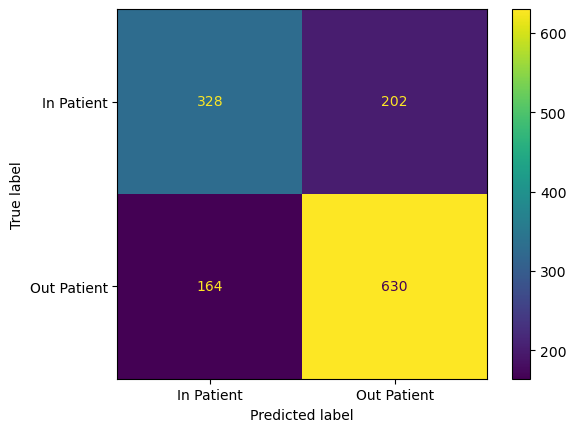

In [15]:
# getting predictions for the testing data
predictions = model.predict(X_test)

# creating confusion matrix
c_matrix(y_test,predictions)

Observations:

* 328 True Positives: correctly predicted as positive (malicious)
* 630 True Negatives: correctly predicted as negative (legitimate)
* 164 False Negativs: incorrectly predicted as negative
* 202 False Positives: incorrectly predicted as positive

## 5. Hyper Parameter Tuning

In [16]:
# checking different number of n_neighbors
for n_neighbors in [1,2,4,8,12,16]:
    
        #Define the model
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        #train the model
        model.fit(X_train, y_train)

        #print results
        print(f'n_neighbors = {n_neighbors}')
        print(f'Accuracy on training set: {model.score(X_train, y_train):.2f}')
        print(f'Accuracy on test set: {model.score(X_test, y_test):.2f}\n')

n_neighbors = 1
Accuracy on training set: 1.00
Accuracy on test set: 0.68

n_neighbors = 2
Accuracy on training set: 0.83
Accuracy on test set: 0.64

n_neighbors = 4
Accuracy on training set: 0.80
Accuracy on test set: 0.69

n_neighbors = 8
Accuracy on training set: 0.78
Accuracy on test set: 0.71

n_neighbors = 12
Accuracy on training set: 0.77
Accuracy on test set: 0.73

n_neighbors = 16
Accuracy on training set: 0.77
Accuracy on test set: 0.73



### 5.1 All hyper parameters

all the following parameters can be hyper tunned in a Random Forest Classifier

In [17]:
# all parameters and their default values
model_params = KNeighborsClassifier(n_neighbors=5,
                                    weights='uniform',
                                    algorithm='auto',
                                    leaf_size=30,
                                    p=2,
                                    metric='minkowski',
                                    metric_params=None,
                                    n_jobs=None
                                   )
